In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("C:/Users/Mega Store/Downloads/Salaries.csv")

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# Task 1

In [4]:
df.shape

(148654, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [6]:
print(df.isnull().sum())

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


#  Task 3

In [7]:
numerical_columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
df_cleaned = df.drop(columns=["Notes","Status"])


In [8]:
print(df_cleaned.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [11]:
df_cleaned.shape

(148654, 11)

# Task 2

In [12]:
df_cleaned.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643
std,42912.857795,42676.946745,11454.226449,8056.493470,13398.411899,50517.005274,62793.533483,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33847.017500,0.000000,0.000000,22342.297500,36168.995000,44065.650000,2012.000000
50%,74327.500000,65092.190000,0.000000,811.350000,25007.893151,71426.610000,92404.090000,2013.000000
75%,111490.750000,94605.740000,4658.667500,4235.907500,33468.980000,105839.135000,132876.450000,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


# Task 4

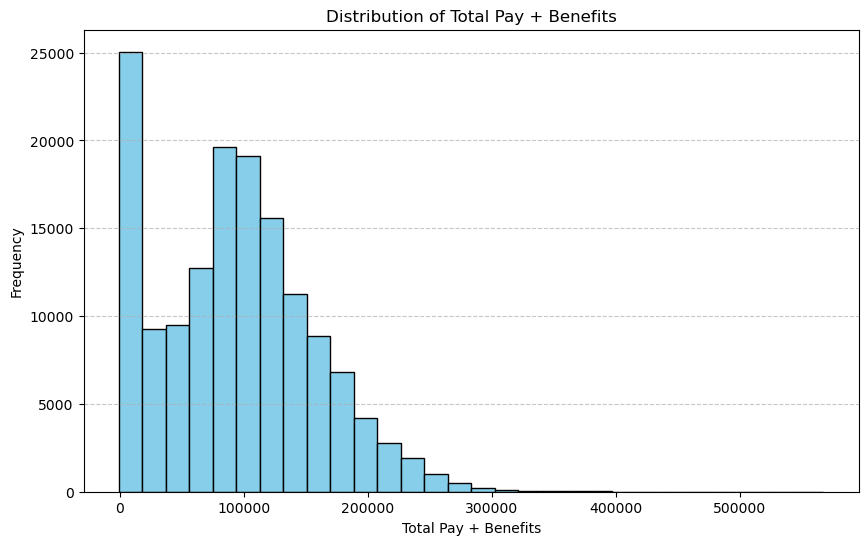

In [15]:
# Distribution of Salaries (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['TotalPayBenefits'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Pay + Benefits')
plt.xlabel('Total Pay + Benefits')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

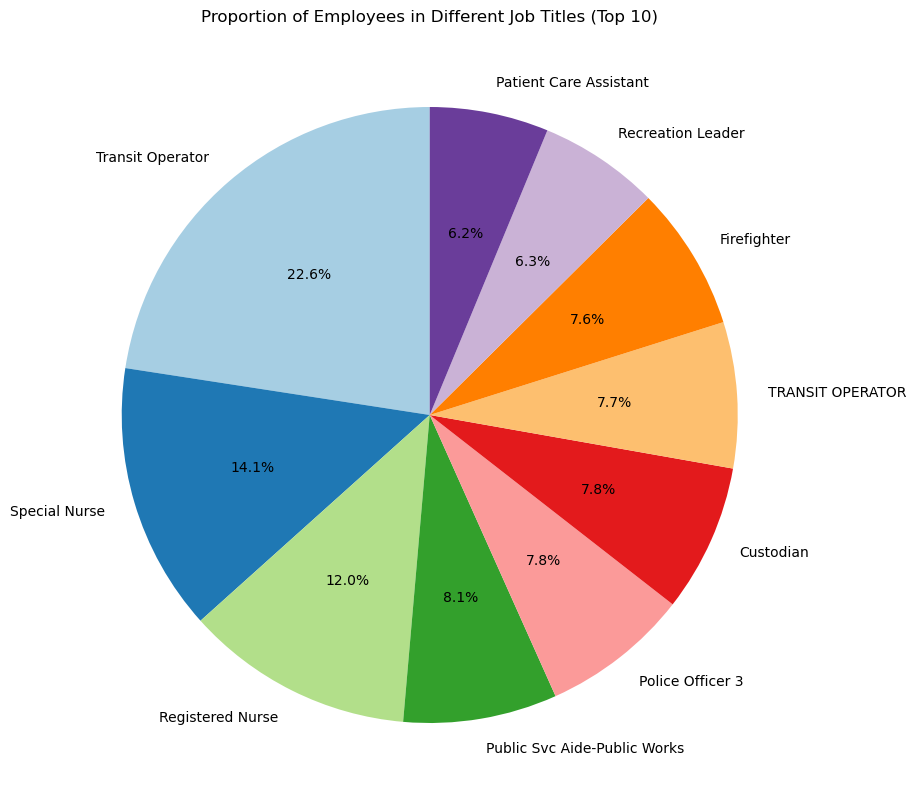

In [18]:
# Proportion of Employees in Different Departments (Pie Chart)
department_counts = df_cleaned['JobTitle'].value_counts().head(10)  # Displaying the top 10 job titles for better visualization
plt.figure(figsize=(10, 10))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proportion of Employees in Different Job Titles (Top 10)')
plt.show()

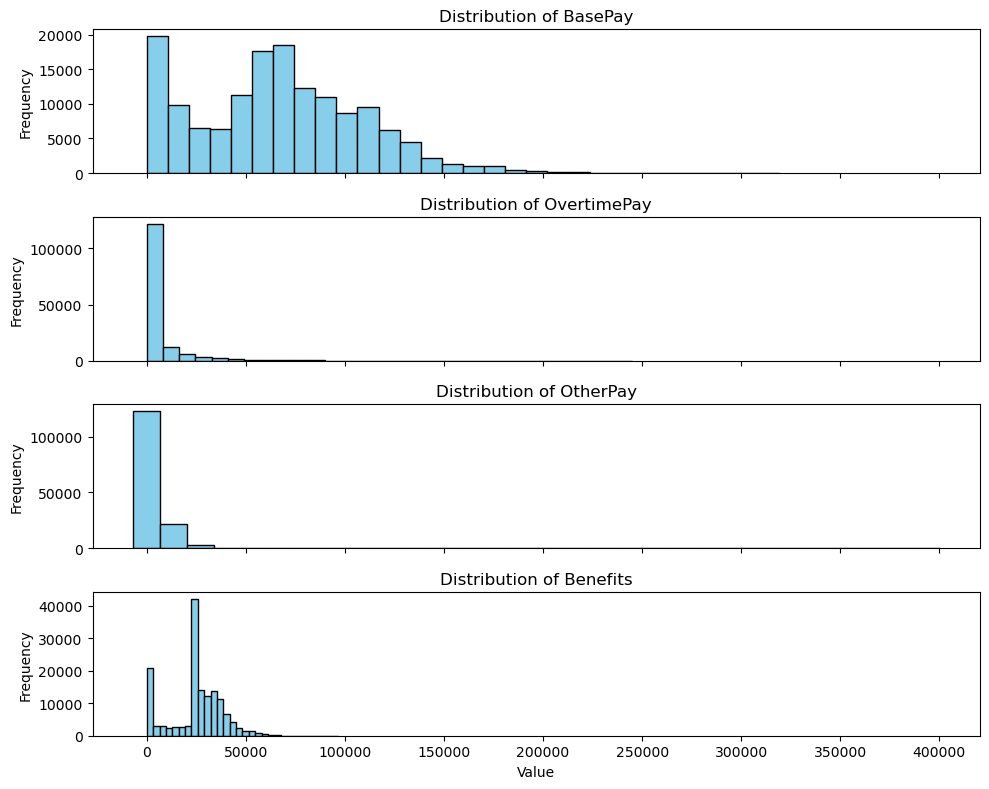

In [16]:
columns_for_histograms = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']

# Create subplots for nested histograms
fig, axes = plt.subplots(nrows=len(columns_for_histograms), ncols=1, figsize=(10, 8), sharex=True)

# Plot nested histograms
for i, column in enumerate(columns_for_histograms):
    axes[i].hist(df_cleaned[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_ylabel('Frequency')

# Add x-axis label to the bottom subplot
axes[-1].set_xlabel('Value')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Task 5

In [20]:
grouped_data = df_cleaned.groupby(['JobTitle', 'Year'])
summary_statistics = grouped_data['TotalPayBenefits'].mean()

print(summary_statistics)

JobTitle                                        Year
ACCOUNT CLERK                                   2011    44035.664337
ACCOUNTANT                                      2011    47429.268000
ACCOUNTANT INTERN                               2011    29031.742917
ACPO,JuvP, Juv Prob (SFERS)                     2014    80266.370000
ACUPUNCTURIST                                   2011    67594.400000
                                                            ...     
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  2011    53632.870000
Youth Comm Advisor                              2012    85774.390000
                                                2013    51344.310000
                                                2014    52011.190000
ZOO CURATOR                                     2011    66686.560000
Name: TotalPayBenefits, Length: 4137, dtype: float64


# Task 6

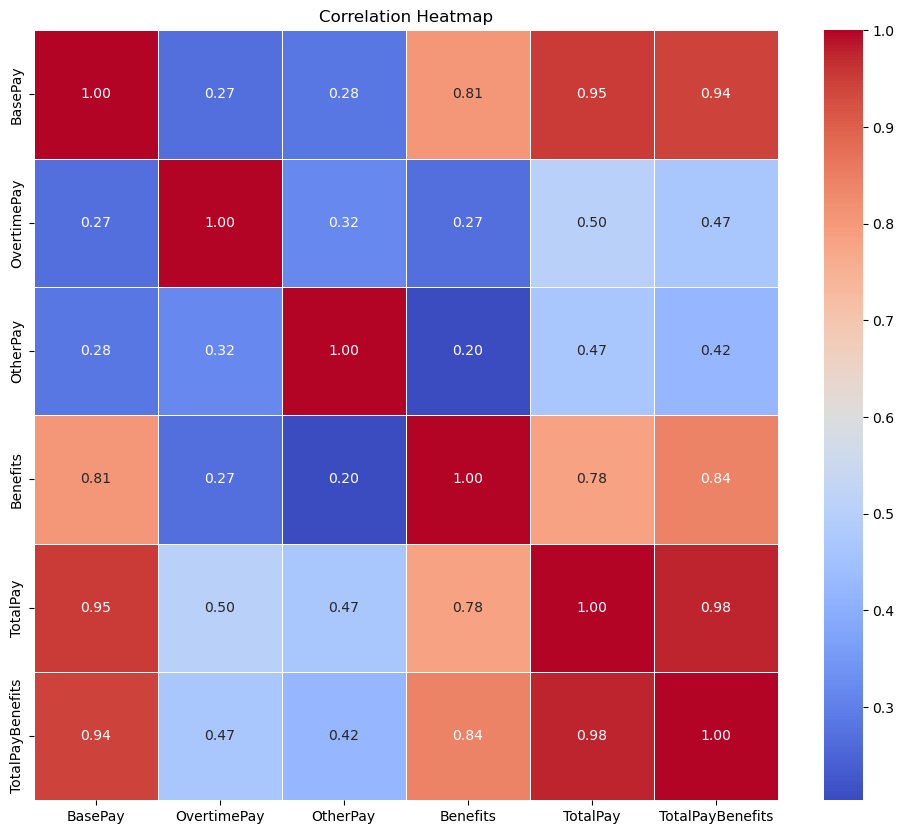

In [26]:
# Select columns for correlation analysis
columns_for_corr = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']

# Calculate the correlation matrix
correlation_matrix = df_cleaned[columns_for_corr].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()